In [180]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [181]:
# data = pd.read_csv('spy dal 2022.csv', sep=",", parse_dates=True, index_col=0)
data = yf.download('TQQQ', start='2000-01-01', end='2024-12-31')

[*********************100%%**********************]  1 of 1 completed


In [182]:
data["returns"] = data["Close"].pct_change()
data["volatility"] = data["returns"].rolling(window=20).std()

data.dropna(inplace=True)


<Axes: xlabel='Date'>

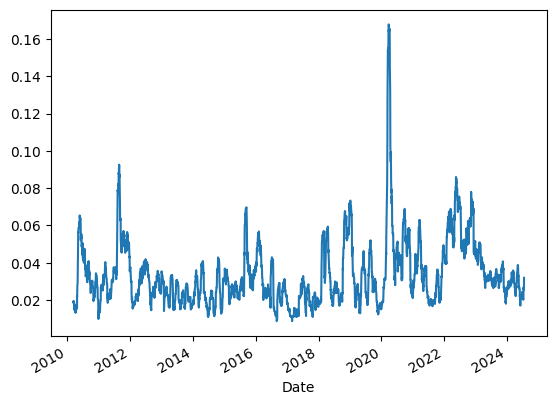

In [183]:
data["volatility"].plot()

In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ["volatility"]
data[features] = scaler.fit_transform(data[features])

In [185]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
data["cluster"] = kmeans.fit_predict(data[features])


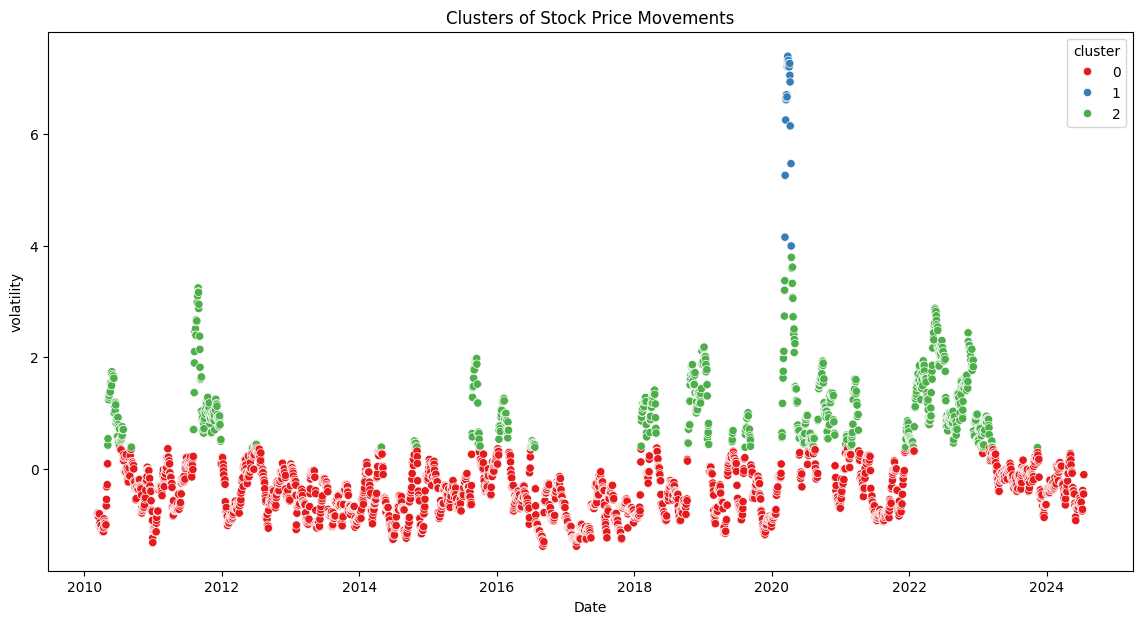

In [186]:

# Visualizza i risultati
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data.index, y=data['volatility'], hue=data['cluster'], palette='Set1', legend='full')
plt.title('Clusters of Stock Price Movements')
plt.show()

In [187]:
Cluster0 = data[data["cluster"] == 0]
Cluster1 = data[data["cluster"] == 1]
Cluster2 = data[data["cluster"] == 2]

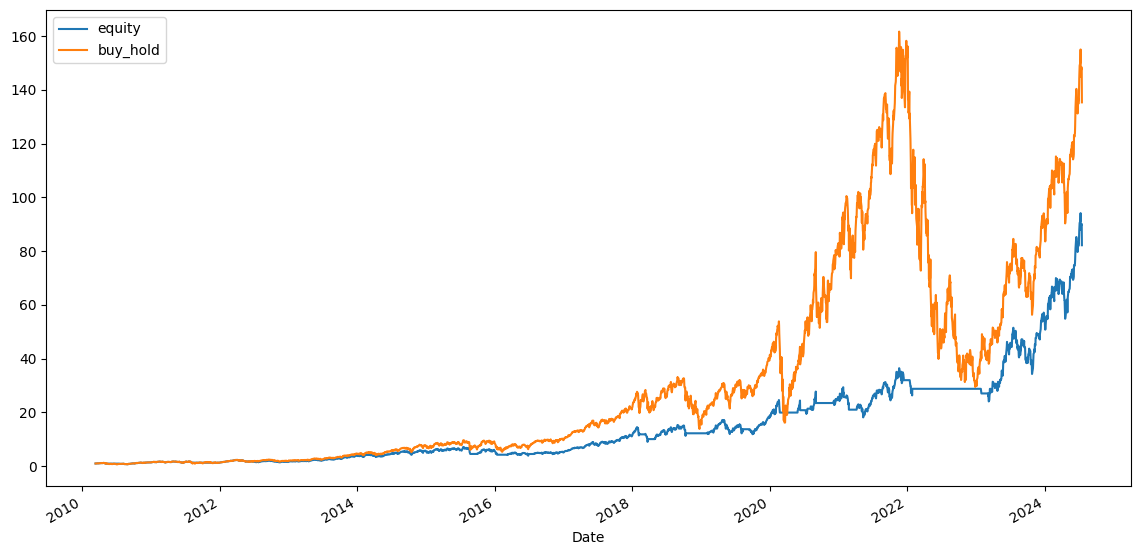

In [212]:
data["strategy"] = np.where((data["cluster"] == 0).shift(1), data["returns"], 0)

data["equity"] = (1 + data["strategy"]).cumprod()
data["buy_hold"] = (1 + data["returns"]).cumprod()

plt.figure(figsize=(14, 7))
data["equity"].plot()
data["buy_hold"].plot()
legend = plt.legend()

<Axes: xlabel='Date'>

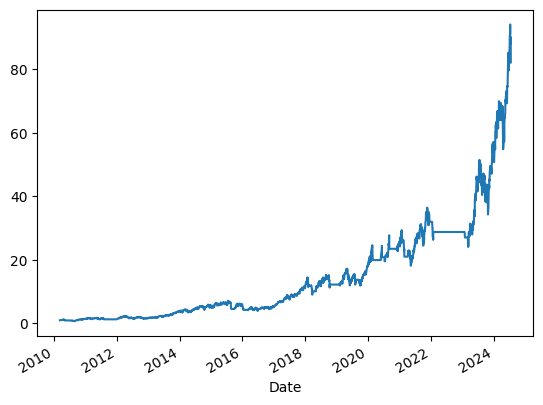

In [213]:
data["equity"].plot()

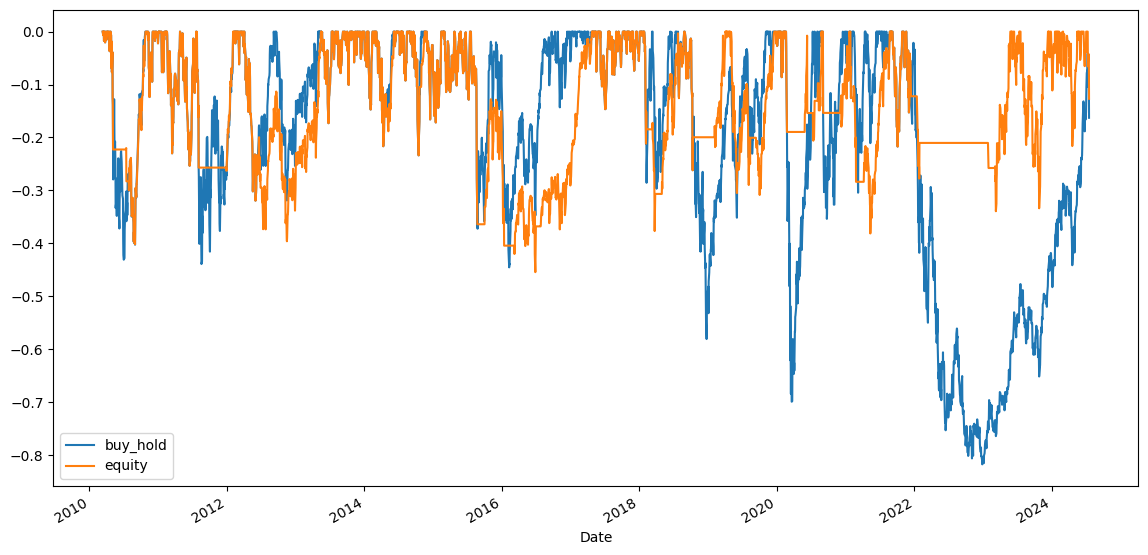

In [205]:
DD_buy_hold = (data["buy_hold"] / data["buy_hold"].cummax() - 1)
DD_strategy = (data["equity"] / data["equity"].cummax() - 1)

plt.figure(figsize=(14, 7))
DD_buy_hold.plot()
DD_strategy.plot()
legend = plt.legend()


In [206]:
DD_max_buy_hold = DD_buy_hold.min()
DD_max_strategy = DD_strategy.min()

DD_max_buy_hold, DD_max_strategy

(-0.8175454453754905, -0.4544488716789603)